In [1]:
import os 
import sys
import glob
from tqdm import tqdm

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

import MDAnalysis as mda
from MDAnalysis.analysis import distances
from MDAnalysis.analysis.rms import RMSD

In [3]:
pdb_file = '../MD_exps/fs-pep/pdb/fs-peptide.pdb'

traj_files = sorted(glob.glob('../MD_exps/fs-pep/omm_runs_*/output.dcd'))

In [4]:
rmsd_profs = [] 
ref_traj = mda.Universe(pdb_file)
for traj_file in tqdm(traj_files): 
    mda_traj = mda.Universe(pdb_file, traj_file) 
    rmsd_inst = RMSD(mda_traj, ref_traj, select='protein and name CA') 
    rmsd_inst.run() 
    rmsd_profs.append(rmsd_inst.rmsd)

100%|██████████| 840/840 [01:15<00:00, 11.09it/s]


In [29]:
omm_dirs = sorted(glob.glob('../MD_exps/fs-pep/omm_runs_*'))

In [36]:
omm_1st_iter = omm_dirs[:120] 
omm_2nd_iter = [output[:-4] for omm_dir in omm_dirs[120:240] 
                for output in os.listdir(omm_dir) 
                if output.endswith('.chk') and output.startswith('omm_runs')] 
omm_1st_cont = [omm_dir in omm_2nd_iter for omm_dir in omm_1st_iter]

In [38]:
len(omm_1st_cont)

120

/Users/hm/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


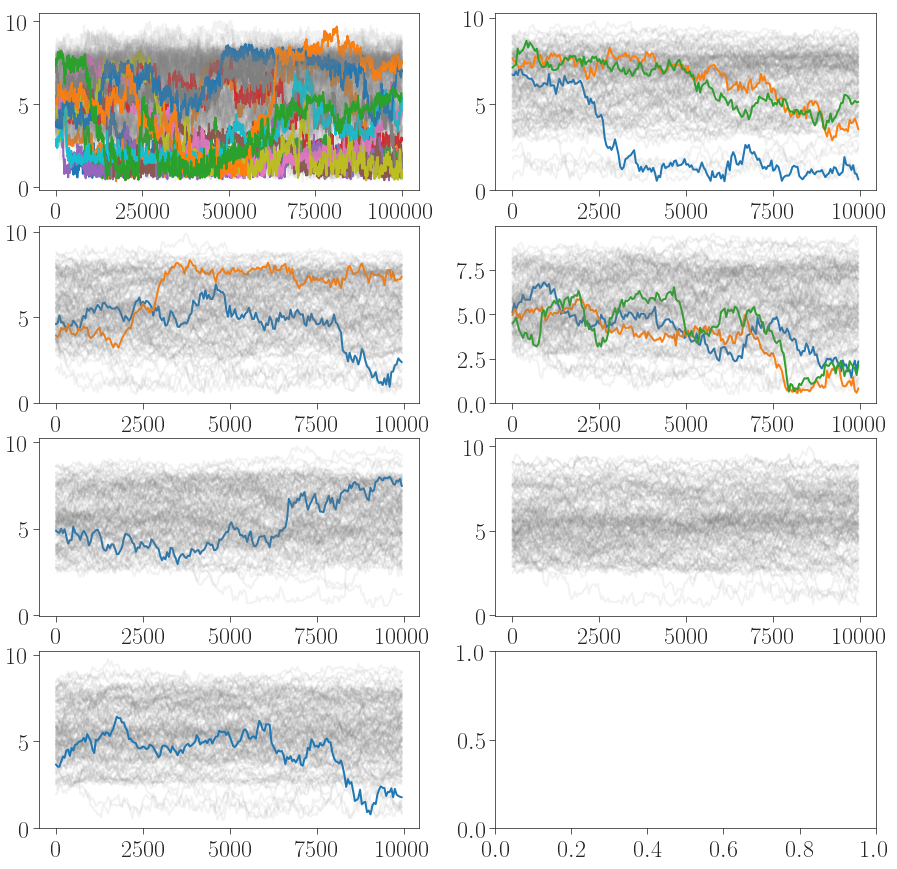

In [47]:
fig, axes = plt.subplots(ncols=2,nrows=4, figsize=(15,15)) 
n_traj = 0 
for i, ax in enumerate(axes.flatten()[:-1]): 
    for j, rmsd in enumerate(rmsd_profs[120*i:120*(i+1)]): 
        if max(rmsd[:,2]) - min(rmsd[:,2]) > 5: 
            if len(rmsd[:,2]) <= 200: 
                transition = True 
                plot_setup = {'alpha' : 1} 
            else: 
                for k in range(len(rmsd) - 200): 
                    if max(rmsd[k:k+200, 2]) - min(rmsd[k:k+200, 2]) > 5 and min(rmsd[k:k+200, 2]) < 2:  
                        transition = True 
                        plot_setup = {'alpha' : 1} 
                        n_traj += 1 
                        break
        else: 
            transition = False 
            plot_setup = {'alpha' : 0.1, 'color': 'gray'}
        ax.plot(rmsd[:,1], rmsd[:,2], **plot_setup) 
        

In [46]:
%run ~/.matplotlib.py

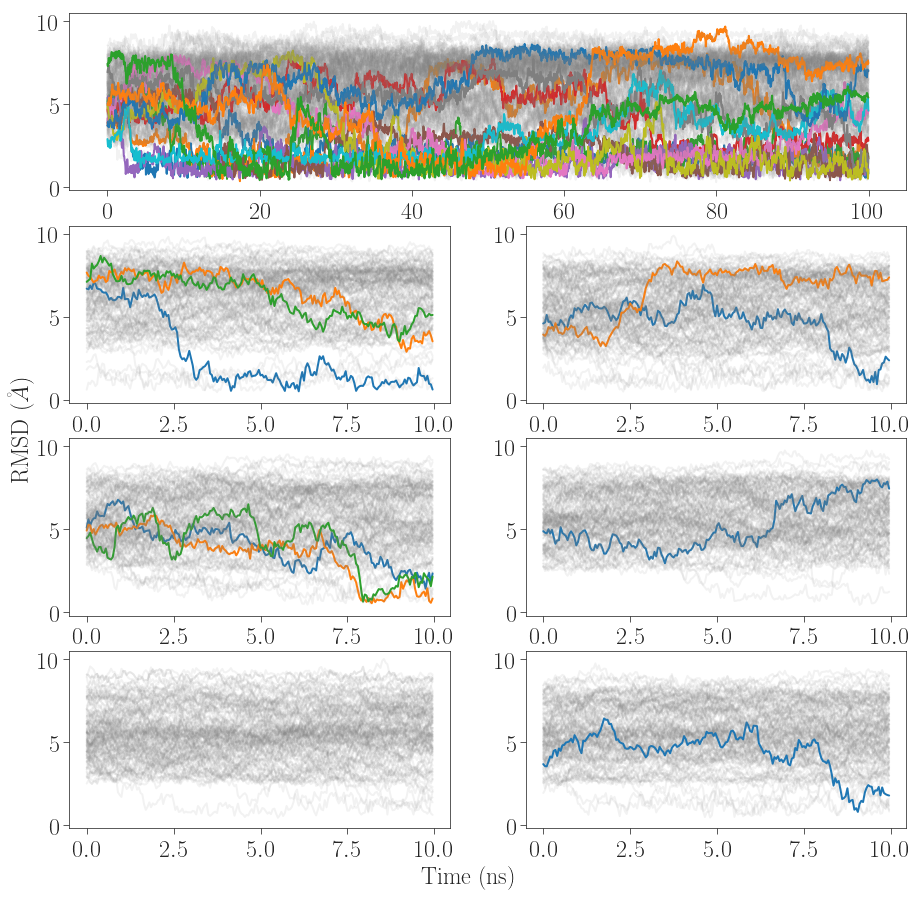

In [78]:
fig = plt.figure(figsize=(15, 15)) 
ax1 = plt.subplot(4, 1, 1)

for j, rmsd in enumerate(rmsd_profs[0:120]): 
    if max(rmsd[:,2]) - min(rmsd[:,2]) > 5:
        for k in range(len(rmsd) - 200):
            if max(rmsd[k:k+200, 2]) - min(rmsd[k:k+200, 2]) > 5 and min(rmsd[k:k+200, 2]) < 2:  
                transition = True 
                plot_setup = {'alpha' : 1} 
                break 
    else: 
        transition = False 
        plot_setup = {'alpha' : 0.1, 'color': 'gray'}
    ax1.plot(rmsd[:,1]/1000, rmsd[:,2], **plot_setup) 

y_setup = ax1.get_ylim() 
ax_list = [ax1] 


for i in range(6): 
    ax = plt.subplot(4, 2, i+3)
    for j, rmsd in enumerate(rmsd_profs[120*(i+1):120*(i+2)]): 
        if max(rmsd[:,2]) - min(rmsd[:,2]) > 5: # and min(rmsd[:,2]) < 2: 
            transition = True 
            plot_setup = {'alpha' : 1} 
        else: 
            transition = False 
            plot_setup = {'alpha' : 0.1, 'color': 'gray'}
        ax.plot(rmsd[:,1]/1000, rmsd[:,2], **plot_setup) 
        ax.set_ylim(y_setup)
        ax_list += [ax]
        
ax_list[-1].set_xlabel('Time (ns)', position=(-.15, 0))
ax_list[3].set_ylabel(r'RMSD ($\AA$)', position=(0, -.15)) 
fig.savefig('fsp.pdf', dpi=300, bbox_inches='tight')

In [44]:
def example_plot(ax):
    ax.plot([1, 2])
    ax.set_xlabel('x-label', fontsize=next(fontsizes))
    ax.set_ylabel('y-label', fontsize=next(fontsizes))
    ax.set_title('Title', fontsize=next(fontsizes))

NameError: global name 'fontsizes' is not defined

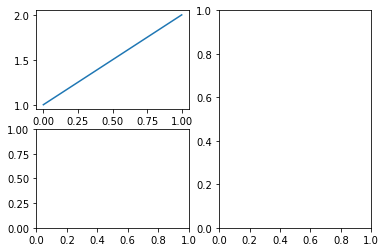

In [45]:
fig = plt.figure()

ax1 = plt.subplot(221)
ax2 = plt.subplot(223)
ax3 = plt.subplot(122)

example_plot(ax1)
example_plot(ax2)
example_plot(ax3)

plt.tight_layout()


In [6]:
frame_mini_RMSD = np.argmin(np.vstack(rmsd_profs)[:,2])

print np.min(np.vstack(rmsd_profs)[:,2])

traj_dict = {}
for traj_file in tqdm(sorted(traj_files[:])): 
    mda_traj = mda.Universe(pdb_file, traj_file) 
    traj_dict[traj_file] = len(mda_traj.trajectory)

from utils import find_frame, write_pdb_frame 
frame_mini_RMSD = np.argmin(np.vstack(rmsd_profs[120:])[:,2])
traj_frame = find_frame(traj_dict, frame_mini_RMSD) 
print traj_frame

write_pdb_frame(traj_frame[0], pdb_file, traj_frame[1], 'low_RMSD.pdb')

  1%|          | 7/840 [00:00<00:12, 68.97it/s]

0.28879105362850566


100%|██████████| 840/840 [00:04<00:00, 184.16it/s]
Using TensorFlow backend.


('../MD_exps/fs-pep/omm_runs_1570731217/output.dcd', 910)


'low_RMSD.pdb'

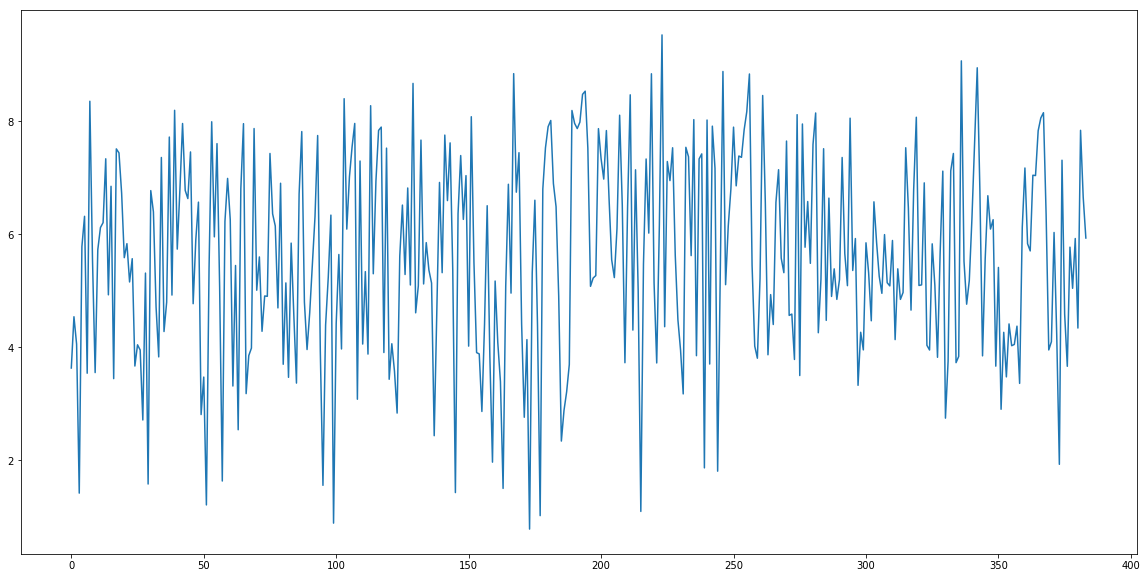

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(np.vstack(rmsd_profs)[::1000,2])

In [10]:
hist, bin_edges = np.histogram(rmsd_inst.rmsd[:,2], bins=50)

In [11]:
bin_labels = np.digitize(rmsd_inst.rmsd[:,2], bin_edges)

```python 
import MDAnalysis
from MDAnalysis.tests.datafiles import PDB, XTC

u = MDAnalysis.Universe(PDB, XTC)
protein = u.select_atoms("protein")
with MDAnalysis.Writer("protein.xtc", protein.n_atoms) as W:
    for ts in u.trajectory:
        W.write(protein)
```

In [16]:
np.unique(bin_labels, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]),
 array([  15,   55,  102,  104,  129,   77,  125,  187,  192,  150,  155,
         160,  202,  295,  460,  598,  732,  936, 1061, 1187, 1446, 1619,
        1574, 1529, 1409, 1427, 1362, 1195, 1053,  869,  843,  690,  530,
         539,  483,  397,  447,  300,  179,  117,  112,   89,   99,   84,
          74,   55,   16,    8,    7,   10,    1]))

In [17]:
hist

array([  15,   55,  102,  104,  129,   77,  125,  187,  192,  150,  155,
        160,  202,  295,  460,  598,  732,  936, 1061, 1187, 1446, 1619,
       1574, 1529, 1409, 1427, 1362, 1195, 1053,  869,  843,  690,  530,
        539,  483,  397,  447,  300,  179,  117,  112,   89,   99,   84,
         74,   55,   16,    8,    7,   11])

In [13]:
with mda.Writer('VHP.pdb', mda_traj.atoms.n_atoms) as W: 
    for label in range(10, 50): 
        frame_indices = np.array(np.where(bin_labels == label+1)).flatten()
        # Number of frame to output 
        n_frame = np.round(hist[label]/float(sum(hist[10:])) * 100)
        for i in range(int(n_frame)): 
            label = np.random.choice(frame_indices) 
            mda_traj.trajectory[label] 
            W.write(mda_traj.atoms)
        

/Users/hm/anaconda2/lib/python2.7/site-packages/MDAnalysis/coordinates/base.py:837: UserWarning: Reader has no dt information, set to 1.0 ps
  warnings.warn("Reader has no dt information, set to 1.0 ps")


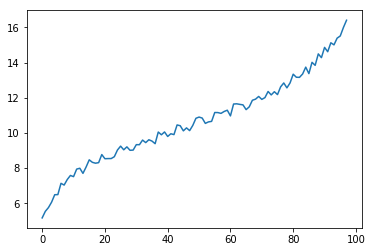

In [14]:
traj_file = 'VHP.pdb'
mda_traj = mda.Universe(pdb_file, traj_file) 
rmsd_inst = RMSD(mda_traj, ref_traj, select='protein and name CA') 
rmsd_inst.run()  

fig, ax = plt.subplots() 
ax.plot(rmsd_inst.rmsd[:,1], rmsd_inst.rmsd[:,2]) 

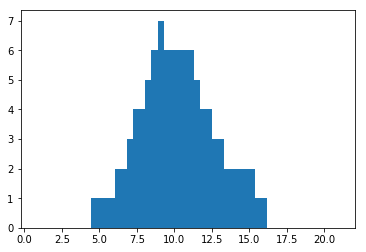

In [76]:
_ = plt.hist(rmsd_inst.rmsd[:,2], bins=bin_edges)

In [21]:
traj_dirs = sorted(glob.glob('../MD_exps/fs-pep/omm_runs_*'))

In [27]:
for traj_dir in traj_dirs[360:480]: 
    print os.listdir(traj_dir)

['output_cm.h5', 'output.log', 'checkpnt.chk', 'omm_runs_1570659659.chk', 'output.dcd']
['output_cm.h5', 'output.log', 'checkpnt.chk', 'omm_runs_1570659661.chk', 'output.dcd']
['output_cm.h5', 'output.log', 'checkpnt.chk', 'omm_runs_1570659677.chk', 'output.dcd']
['omm_runs_1570659679.chk', 'output_cm.h5', 'output.log', 'checkpnt.chk', 'output.dcd']
['omm_runs_1570659681.chk', 'output_cm.h5', 'output.log', 'checkpnt.chk', 'output.dcd']
['omm_runs_1570659683.chk', 'output_cm.h5', 'output.log', 'checkpnt.chk', 'output.dcd']
['omm_runs_1570659684.chk', 'output_cm.h5', 'output.log', 'checkpnt.chk', 'output.dcd']
['output_cm.h5', 'output.log', 'checkpnt.chk', 'omm_runs_1570659706.chk', 'output.dcd']
['output_cm.h5', 'output.log', 'checkpnt.chk', 'omm_runs_1570659710.chk', 'output.dcd']
['output_cm.h5', 'output.log', 'checkpnt.chk', 'omm_runs_1570659712.chk', 'output.dcd']
['omm_runs_1570659722.chk', 'output_cm.h5', 'output.log', 'checkpnt.chk', 'output.dcd']
['omm_runs_1570659723.chk', 'out

In [46]:
sum(np.round(hist[10:]/float(sum(hist[10:])) * 100))

98.0

In [14]:
from sklearn.decomposition import PCA
cm_pca = PCA(n_components=2).fit_transform(contact_matrices)

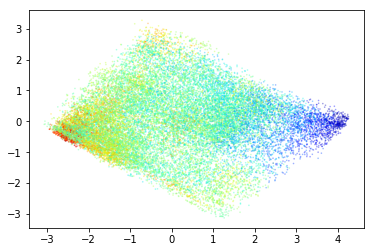

In [19]:
color = np.vstack(rmsd_profs)[:,2]
plt.scatter(cm_pca[:,0], cm_pca[:,1], c=color, cmap='jet', s=.5, alpha=.3)

In [17]:
mda_traj = mda.Universe(pdb_file, traj_files) 

In [18]:
len(mda_traj.trajectory)

25485

In [48]:
np.argmin(np.array(rmsd_inst.rmsd[:,2]))

2053

In [55]:
mda_traj.trajectory[0]

< Timestep 0 with unit cell dimensions [ 0.  0.  0. 90. 90. 90.] >

In [61]:
mda_traj.atoms.write('vhp1ww.pdb')

In [57]:
import simtk.openmm.app as app
import simtk.openmm as omm
import simtk.unit as u

import parmed as pmd

In [58]:
top_file = '../MD_exps/VHP_exp/pdb/vhp1ww.top' 
pdb_file = '../MD_exps/VHP_exp/pdb/vhp1ww.pdb'

In [59]:
pdb = pmd.load_file(top_file, xyz = pdb_file)

In [63]:
app.PDBFile.writeFile(pdb.topology, mda_traj.atoms.positions - mda_traj.atoms.center_of_mass(), open('vhp1ww.pdb', 'w'))